In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for data analysis purposes use import libraries
import pandas as pd 
import numpy as np              
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
#Saving path/location of source excel file to flights
flights = pd.read_csv ('/content/drive/MyDrive/BigDataProject_Group_1/datasets/combined15_16.csv')

In [ ]:
#Displaying the data types and standard stats of the data
flights.info() 

In [ ]:
#Diplays the first 25 rows of the data
flights.head(25)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-01,NK,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,NaN,0.0,157.0,166.0,132.0,1107.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-01,NK,202,DFW,BWI,1342,1337.0,-5.0,11.0,1348.0,1700.0,5.0,1724,1705.0,-19.0,0.0,NaN,0.0,162.0,148.0,132.0,1217.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-01,NK,203,BOS,PBI,1555,1554.0,-1.0,17.0,1611.0,1903.0,5.0,1913,1908.0,-5.0,0.0,NaN,0.0,198.0,194.0,172.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-01,NK,204,PBI,BOS,1205,1204.0,-1.0,11.0,1215.0,1455.0,9.0,1505,1504.0,-1.0,0.0,NaN,0.0,180.0,180.0,160.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-01-01,NK,209,ORD,OAK,1534,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,0.0,NaN,0.0,285.0,248.0,231.0,1836.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Step 2 Making sure that all the attributes have the same format and scale
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
flights['OP_CARRIER'] = flights['OP_CARRIER'].astype(str) 
flights['OP_CARRIER_FL_NUM'] = flights['OP_CARRIER_FL_NUM'].astype(int)
flights['ORIGIN'] = flights['ORIGIN'].astype(str)
flights['DEST'] = flights['DEST'].astype(str)
flights['DEP_DELAY'] = flights['DEP_DELAY'].astype(float)
flights['TAXI_OUT'] = flights['TAXI_OUT'].astype(float)
flights['TAXI_IN'] = flights['TAXI_IN'].astype(float)
flights['ARR_DELAY'] = flights['ARR_DELAY'].astype(float)
flights['CANCELLED'] = flights['CANCELLED'].astype(int)
flights['CANCELLATION_CODE'] = flights['CANCELLATION_CODE'].astype(str)
flights['DIVERTED'] = flights['DIVERTED'].astype(int)
flights['CRS_ELAPSED_TIME'] = flights['CRS_ELAPSED_TIME'].astype(float)
flights['ACTUAL_ELAPSED_TIME'] = flights['ACTUAL_ELAPSED_TIME'].astype(float)
flights['AIR_TIME'] = flights['AIR_TIME'].astype(float)
flights['DISTANCE'] = flights['DISTANCE'].astype(float)
flights['CARRIER_DELAY'] = flights['CARRIER_DELAY'].astype(float)
flights['WEATHER_DELAY'] = flights['WEATHER_DELAY'].astype(float)
flights['NAS_DELAY'] = flights['NAS_DELAY'].astype(float)
flights['ACTUAL_ELAPSED_TIME'] = flights['ACTUAL_ELAPSED_TIME'].astype(float)
flights['SECURITY_DELAY'] = flights['SECURITY_DELAY'].astype(float)
flights['LATE_AIRCRAFT_DELAY'] = flights['LATE_AIRCRAFT_DELAY'].astype(float)
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728007 entries, 0 to 12728006
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            int64         
 16  CANCELLATION_CODE    object        
 17  DIVERTED             int64         
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME

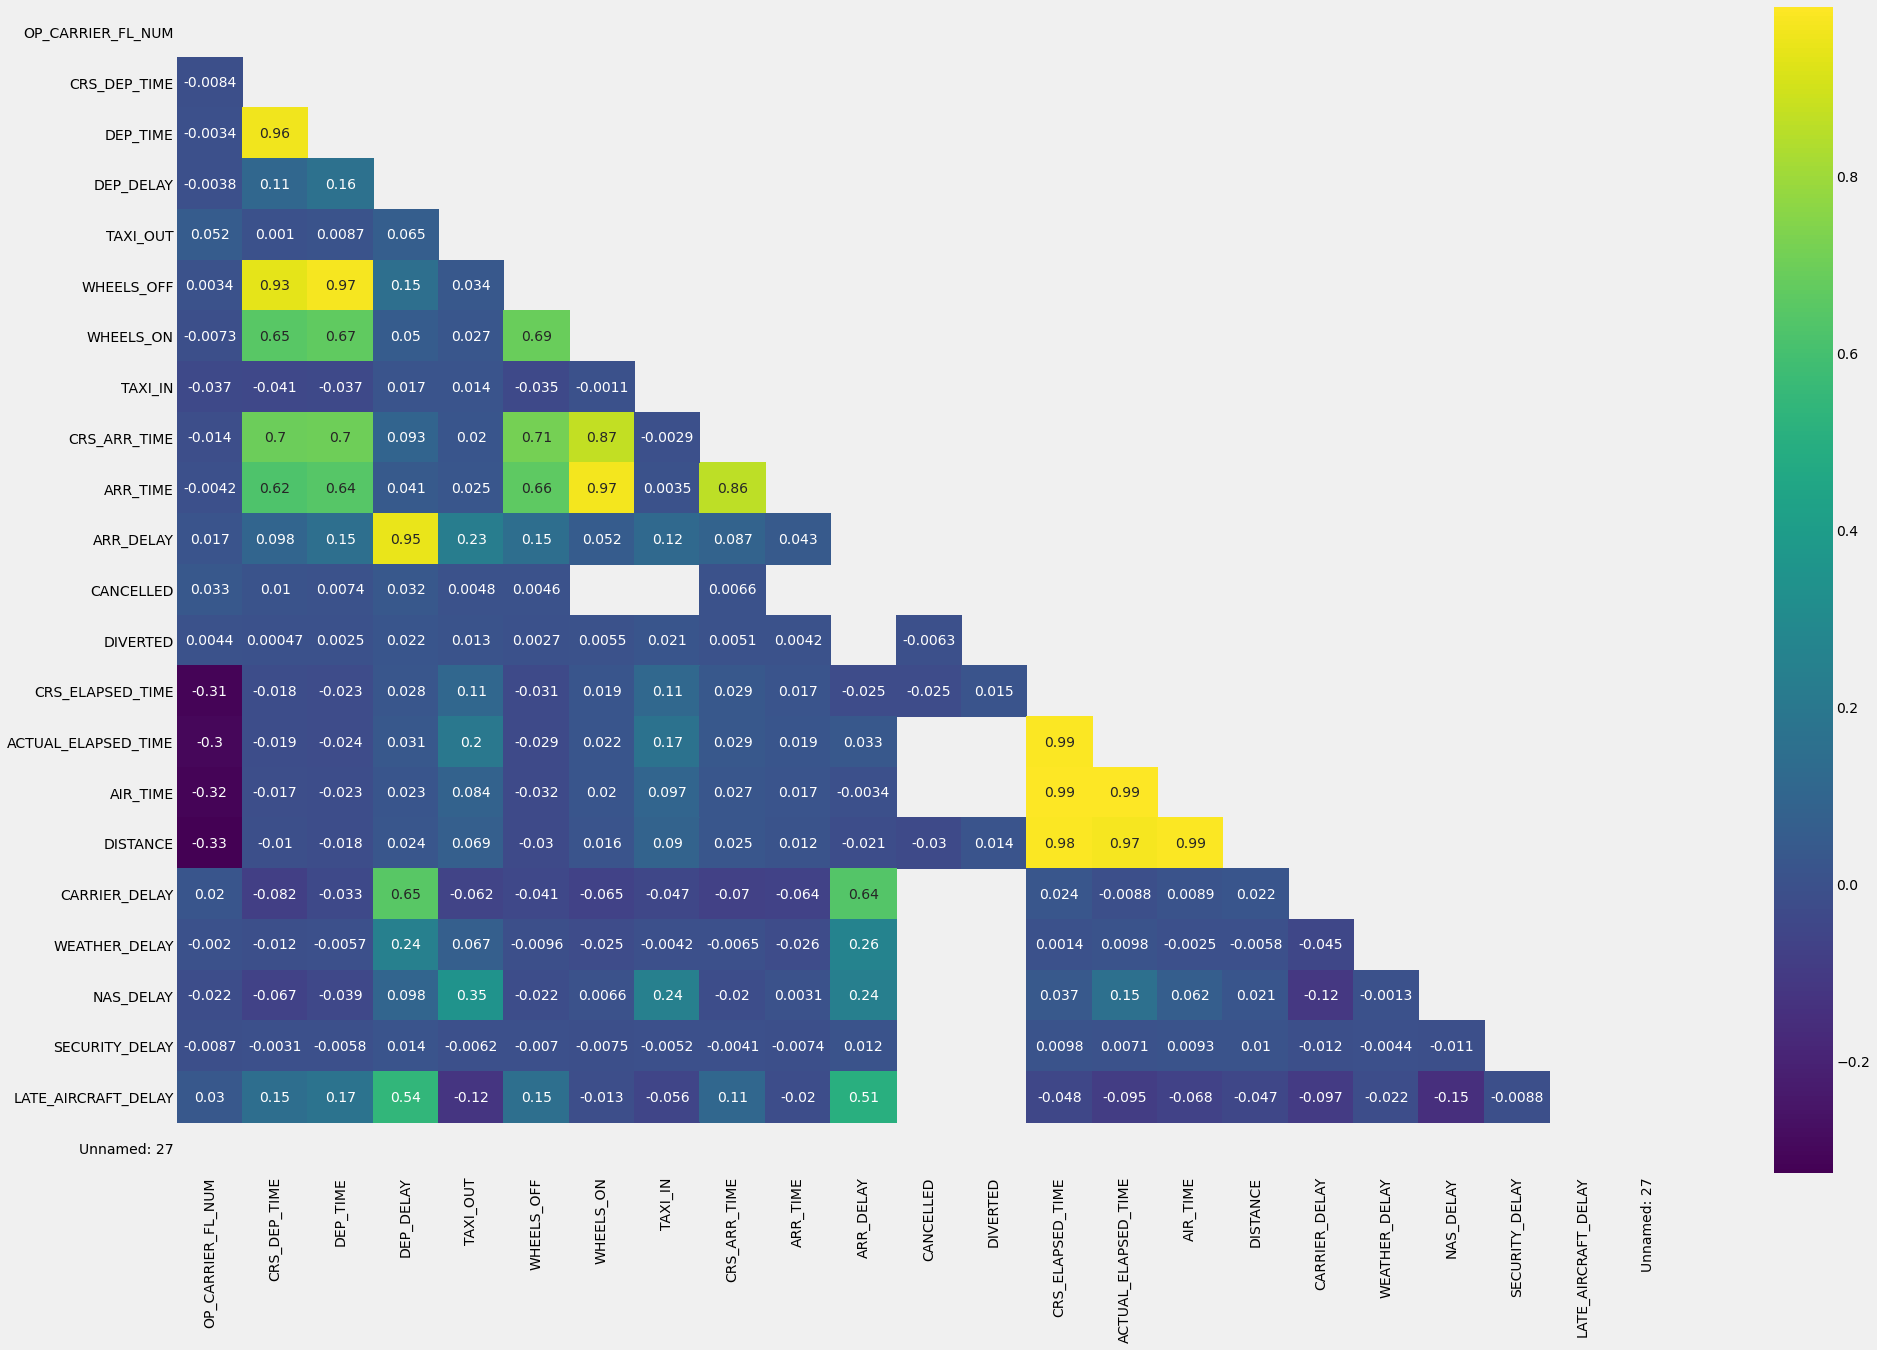

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(30,20))
sns.heatmap(flights.corr(),cmap="viridis",annot=True, fmt='.2g', mask=np.triu(flights.corr()))

In [ ]:
#To get the percentage of missing values in each column(Attribute)
flights.isnull().mean() *100

FL_DATE                  0.000000
OP_CARRIER               0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN                   0.000000
DEST                     0.000000
CRS_DEP_TIME             0.000000
DEP_TIME                 1.504902
DEP_DELAY                1.504902
TAXI_OUT                 1.549268
WHEELS_OFF               1.549268
WHEELS_ON                1.604611
TAXI_IN                  1.604611
CRS_ARR_TIME             0.000000
ARR_TIME                 1.604611
ARR_DELAY                1.811705
CANCELLED                0.000000
CANCELLATION_CODE        0.000000
DIVERTED                 0.000000
CRS_ELAPSED_TIME         0.000110
ACTUAL_ELAPSED_TIME      1.811705
AIR_TIME                 1.811705
DISTANCE                 0.000000
CARRIER_DELAY           81.964293
WEATHER_DELAY           81.964293
NAS_DELAY               81.964293
SECURITY_DELAY          81.964293
LATE_AIRCRAFT_DELAY     81.964293
Unnamed: 27            100.000000
dtype: float64

In [ ]:
#Delete unwanted columns with either too many missing values, or not important to our research.
flights = flights.drop(['FL_DATE'], axis=1)
flights = flights.drop(['OP_CARRIER'], axis=1)
flights = flights.drop(['OP_CARRIER_FL_NUM'], axis=1)
flights = flights.drop(['ORIGIN'], axis=1)
flights = flights.drop(['DEST'], axis=1)
flights = flights.drop(['CANCELLED'], axis=1)
flights = flights.drop(['CANCELLATION_CODE'], axis=1)
flights = flights.drop(['DIVERTED'], axis=1)
flights = flights.drop(['AIR_TIME'], axis=1)
flights = flights.drop(['CARRIER_DELAY'], axis=1)
flights = flights.drop(['WEATHER_DELAY'], axis=1)
flights = flights.drop(['NAS_DELAY'], axis=1)
flights = flights.drop(['SECURITY_DELAY'], axis=1)
flights = flights.drop(['LATE_AIRCRAFT_DELAY'], axis=1)
flights = flights.drop(['Unnamed: 27'], axis=1)

In [ ]:
#To get the percentage of missing values in each column(Attribute)
flights.isnull().mean() *100

CRS_DEP_TIME           0.000000
DEP_TIME               1.504902
DEP_DELAY              1.504902
TAXI_OUT               1.549268
WHEELS_OFF             1.549268
WHEELS_ON              1.604611
TAXI_IN                1.604611
CRS_ARR_TIME           0.000000
ARR_TIME               1.604611
ARR_DELAY              1.811705
CRS_ELAPSED_TIME       0.000110
ACTUAL_ELAPSED_TIME    1.811705
DISTANCE               0.000000
dtype: float64

In [ ]:
#drop rows with na values since there were only a few that were missing 0.000103% to 1.8% per column
#df = df.dropna(how='any',axis=0) 
flights = flights.dropna(how='any', axis=0)

In [ ]:
#To get the percentage of missing values in each column(Attribute)
flights.isnull().mean() *100

CRS_DEP_TIME           0.0
DEP_TIME               0.0
DEP_DELAY              0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
WHEELS_ON              0.0
TAXI_IN                0.0
CRS_ARR_TIME           0.0
ARR_TIME               0.0
ARR_DELAY              0.0
CRS_ELAPSED_TIME       0.0
ACTUAL_ELAPSED_TIME    0.0
DISTANCE               0.0
dtype: float64

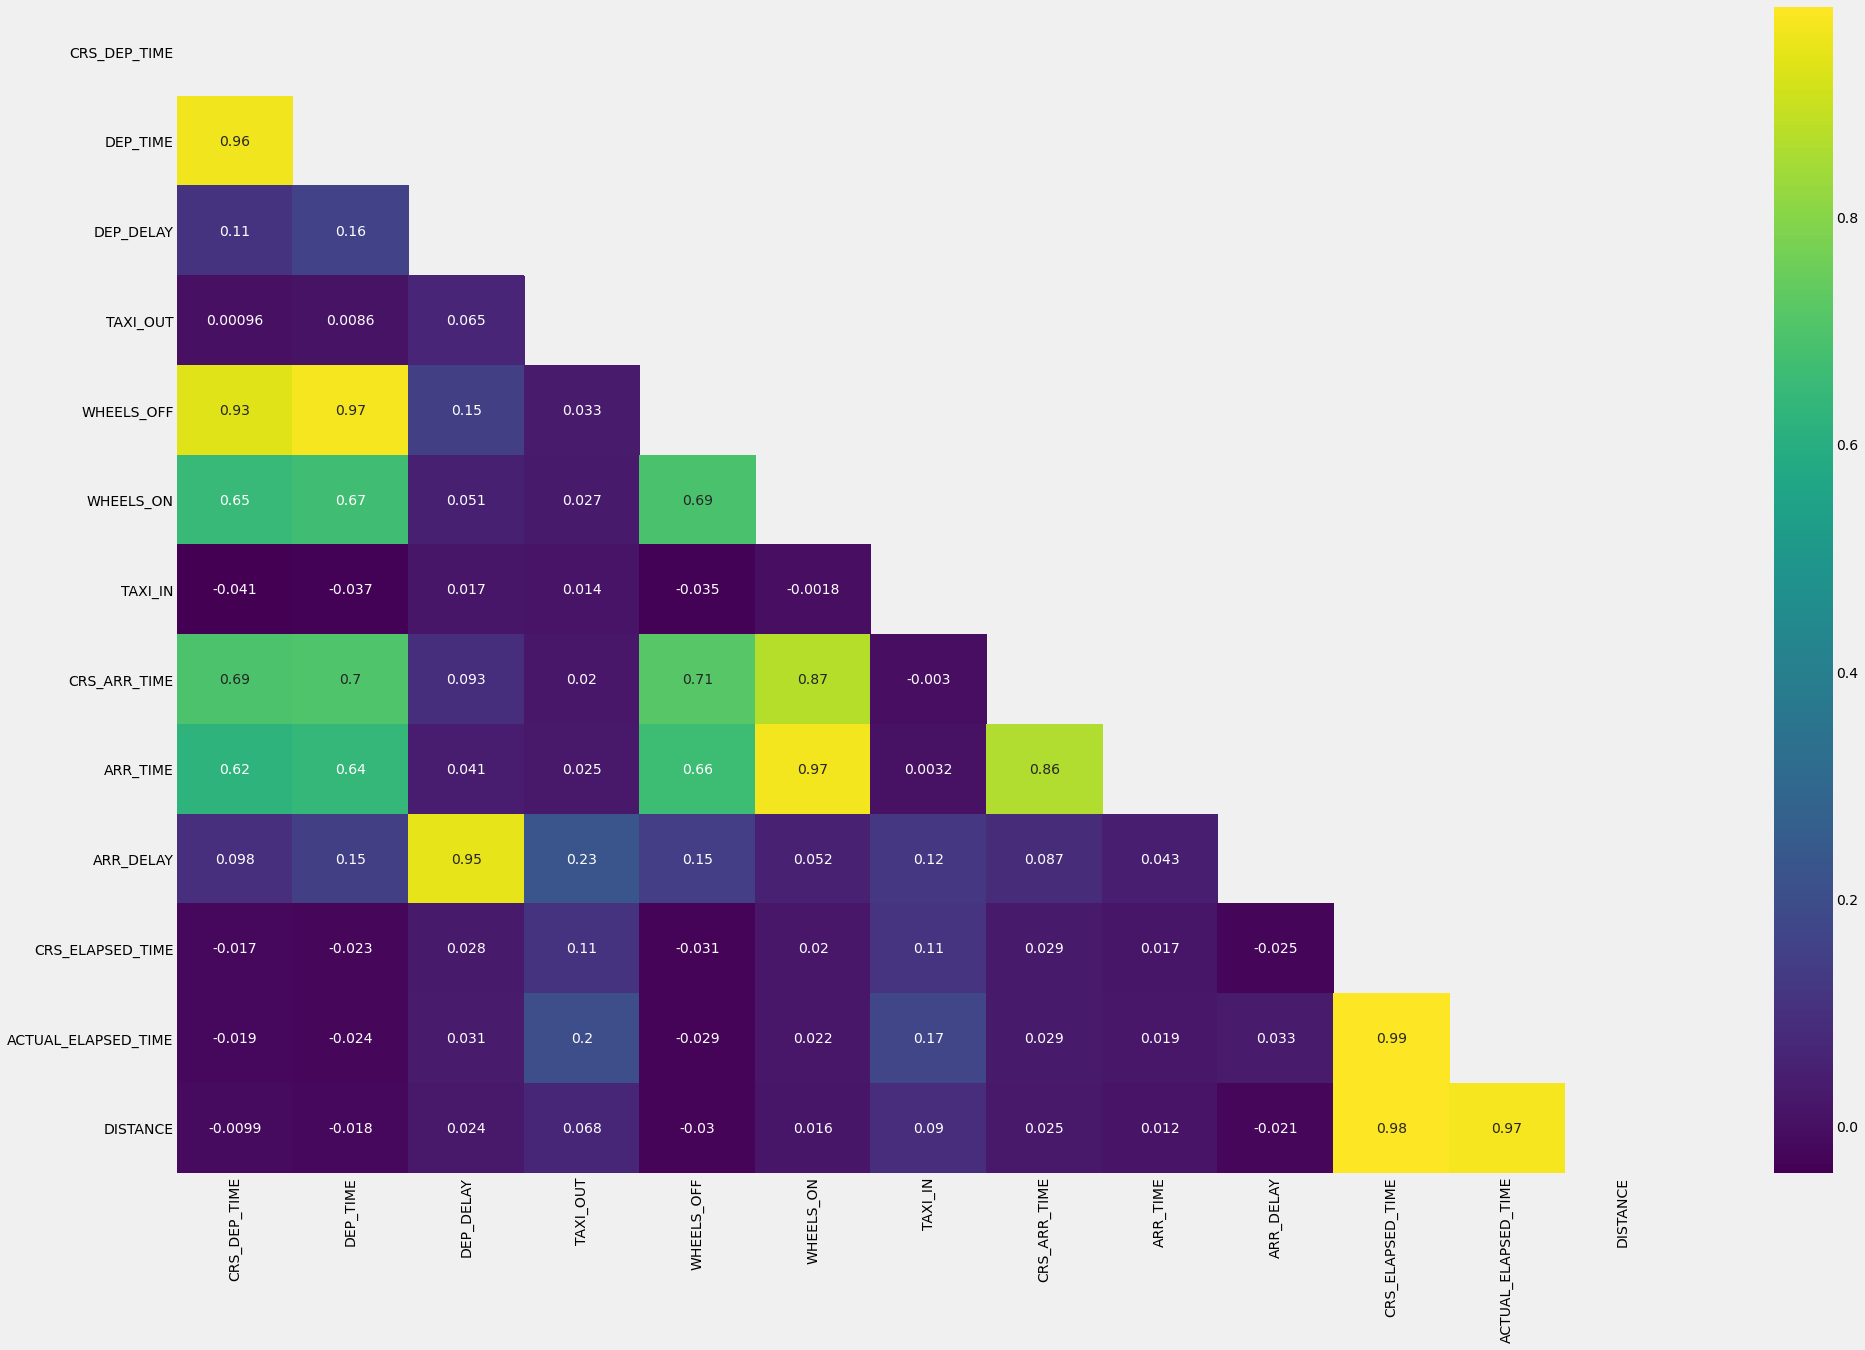

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(30,20))
sns.heatmap(flights.corr(),cmap="viridis",annot=True, fmt='.2g', mask=np.triu(flights.corr()))

In [ ]:
#Add cleaned new data to cleanedAirline.csv
flights.to_csv('/content/drive/My Drive/BigDataProject_Group_1/cleanedBiggerAirline.csv')

In [ ]:
#Link cleanedAirline.csv to newFlights
newFlights = pd.read_csv('/content/drive/My Drive/BigDataProject_Group_1/cleanedBiggerAirline.csv')

In [ ]:
#Display first 10 rows of newFlights
newFlights.head(10)

,Unnamed: 0,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,0,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,63.0,62.0,177.0
1,1,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,194.0,179.0,1076.0
2,2,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,57.0,61.0,177.0
3,3,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,196.0,176.0,1222.0
4,4,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,152.0,140.0,925.0
5,5,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,157.0,166.0,1107.0
6,6,1342,1337.0,-5.0,11.0,1348.0,1700.0,5.0,1724,1705.0,-19.0,162.0,148.0,1217.0
7,7,1555,1554.0,-1.0,17.0,1611.0,1903.0,5.0,1913,1908.0,-5.0,198.0,194.0,1197.0
8,8,1205,1204.0,-1.0,11.0,1215.0,1455.0,9.0,1505,1504.0,-1.0,180.0,180.0,1197.0
9,9,1534,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,285.0,248.0,1836.0


In [ ]:
##Displaying the data types and standard stats of the newFlights
newFlights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497413 entries, 0 to 12497412
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   CRS_DEP_TIME         int64  
 2   DEP_TIME             float64
 3   DEP_DELAY            float64
 4   TAXI_OUT             float64
 5   WHEELS_OFF           float64
 6   WHEELS_ON            float64
 7   TAXI_IN              float64
 8   CRS_ARR_TIME         int64  
 9   ARR_TIME             float64
 10  ARR_DELAY            float64
 11  CRS_ELAPSED_TIME     float64
 12  ACTUAL_ELAPSED_TIME  float64
 13  DISTANCE             float64
dtypes: float64(11), int64(3)
memory usage: 1.3 GB


In [ ]:
#drop auto-generated 'Unnamed: 0' column
newFlights = newFlights.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Important to format the Times in the columns
import datetime

In [ ]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [ ]:
#Format the following time columns
newFlights['CRS_DEP_TIME'] = newFlights['CRS_DEP_TIME'].apply(Format_Hourmin)
newFlights['DEP_TIME'] = newFlights['DEP_TIME'].apply(Format_Hourmin)
newFlights['CRS_ARR_TIME'] = newFlights['CRS_ARR_TIME'].apply(Format_Hourmin)
newFlights['ARR_TIME'] = newFlights['ARR_TIME'].apply(Format_Hourmin)
newFlights['WHEELS_OFF'] = newFlights['WHEELS_OFF'].apply(Format_Hourmin)
newFlights['WHEELS_ON'] = newFlights['WHEELS_ON'].apply(Format_Hourmin)

In [ ]:
#Rename columns in dataset
newFlights = newFlights.rename(columns={'OP_CARRIER': 'Airline',
                                        'CRS_DEP_TIME':'SCHEDULED_DEPARTURE_TIME',
                                        'DEP_TIME':'ACTUAL_DEPARTURE_TIME',
                                        'CRS_ARR_TIME':'SCHEDULED_ARRIVAL_TIME',
                                        'ARR_TIME':'ACTUAL_ARRIVAL_TIME',
                                        'CRS_ELAPSED_TIME':'SCHEDULED_ELAPSED_TIME'})

In [ ]:
#Display top 10 rows with new changes
newFlights.head(10)

,SCHEDULED_DEPARTURE_TIME,ACTUAL_DEPARTURE_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL_TIME,ACTUAL_ARRIVAL_TIME,ARR_DELAY,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,21:47:00,21:43:00,-4.0,15.0,21:58:00,22:38:00,7.0,22:50:00,22:45:00,-5.0,63.0,62.0,177.0
1,10:50:00,11:04:00,14.0,20.0,11:24:00,13:54:00,9.0,14:04:00,14:03:00,-1.0,194.0,179.0,1076.0
2,07:00:00,07:12:00,12.0,19.0,07:31:00,08:03:00,10.0,07:57:00,08:13:00,16.0,57.0,61.0,177.0
3,22:40:00,22:51:00,11.0,8.0,22:59:00,23:43:00,4.0,23:56:00,23:47:00,-9.0,196.0,176.0,1222.0
4,06:23:00,06:20:00,-3.0,15.0,06:35:00,08:30:00,10.0,08:55:00,08:40:00,-15.0,152.0,140.0,925.0
5,12:53:00,12:58:00,5.0,24.0,13:22:00,16:34:00,10.0,16:30:00,16:44:00,14.0,157.0,166.0,1107.0
6,13:42:00,13:37:00,-5.0,11.0,13:48:00,17:00:00,5.0,17:24:00,17:05:00,-19.0,162.0,148.0,1217.0
7,15:55:00,15:54:00,-1.0,17.0,16:11:00,19:03:00,5.0,19:13:00,19:08:00,-5.0,198.0,194.0,1197.0
8,12:05:00,12:04:00,-1.0,11.0,12:15:00,14:55:00,9.0,15:05:00,15:04:00,-1.0,180.0,180.0,1197.0
9,15:34:00,15:34:00,0.0,11.0,15:45:00,17:36:00,6.0,18:19:00,17:42:00,-37.0,285.0,248.0,1836.0


In [ ]:
#dropping the time format ones since they are not used
newFlights = newFlights.drop(['SCHEDULED_DEPARTURE_TIME'], axis=1)
newFlights = newFlights.drop(['ACTUAL_DEPARTURE_TIME'], axis=1)
newFlights = newFlights.drop(['SCHEDULED_ARRIVAL_TIME'], axis=1)
newFlights = newFlights.drop(['ACTUAL_ARRIVAL_TIME'], axis=1)
newFlights = newFlights.drop(['WHEELS_OFF'], axis=1)
newFlights = newFlights.drop(['WHEELS_ON'], axis=1)

In [ ]:
#Display top 10 rows with new changes
newFlights.head(10)

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,-4.0,15.0,7.0,-5.0,63.0,62.0,177.0
1,14.0,20.0,9.0,-1.0,194.0,179.0,1076.0
2,12.0,19.0,10.0,16.0,57.0,61.0,177.0
3,11.0,8.0,4.0,-9.0,196.0,176.0,1222.0
4,-3.0,15.0,10.0,-15.0,152.0,140.0,925.0
5,5.0,24.0,10.0,14.0,157.0,166.0,1107.0
6,-5.0,11.0,5.0,-19.0,162.0,148.0,1217.0
7,-1.0,17.0,5.0,-5.0,198.0,194.0,1197.0
8,-1.0,11.0,9.0,-1.0,180.0,180.0,1197.0
9,0.0,11.0,6.0,-37.0,285.0,248.0,1836.0


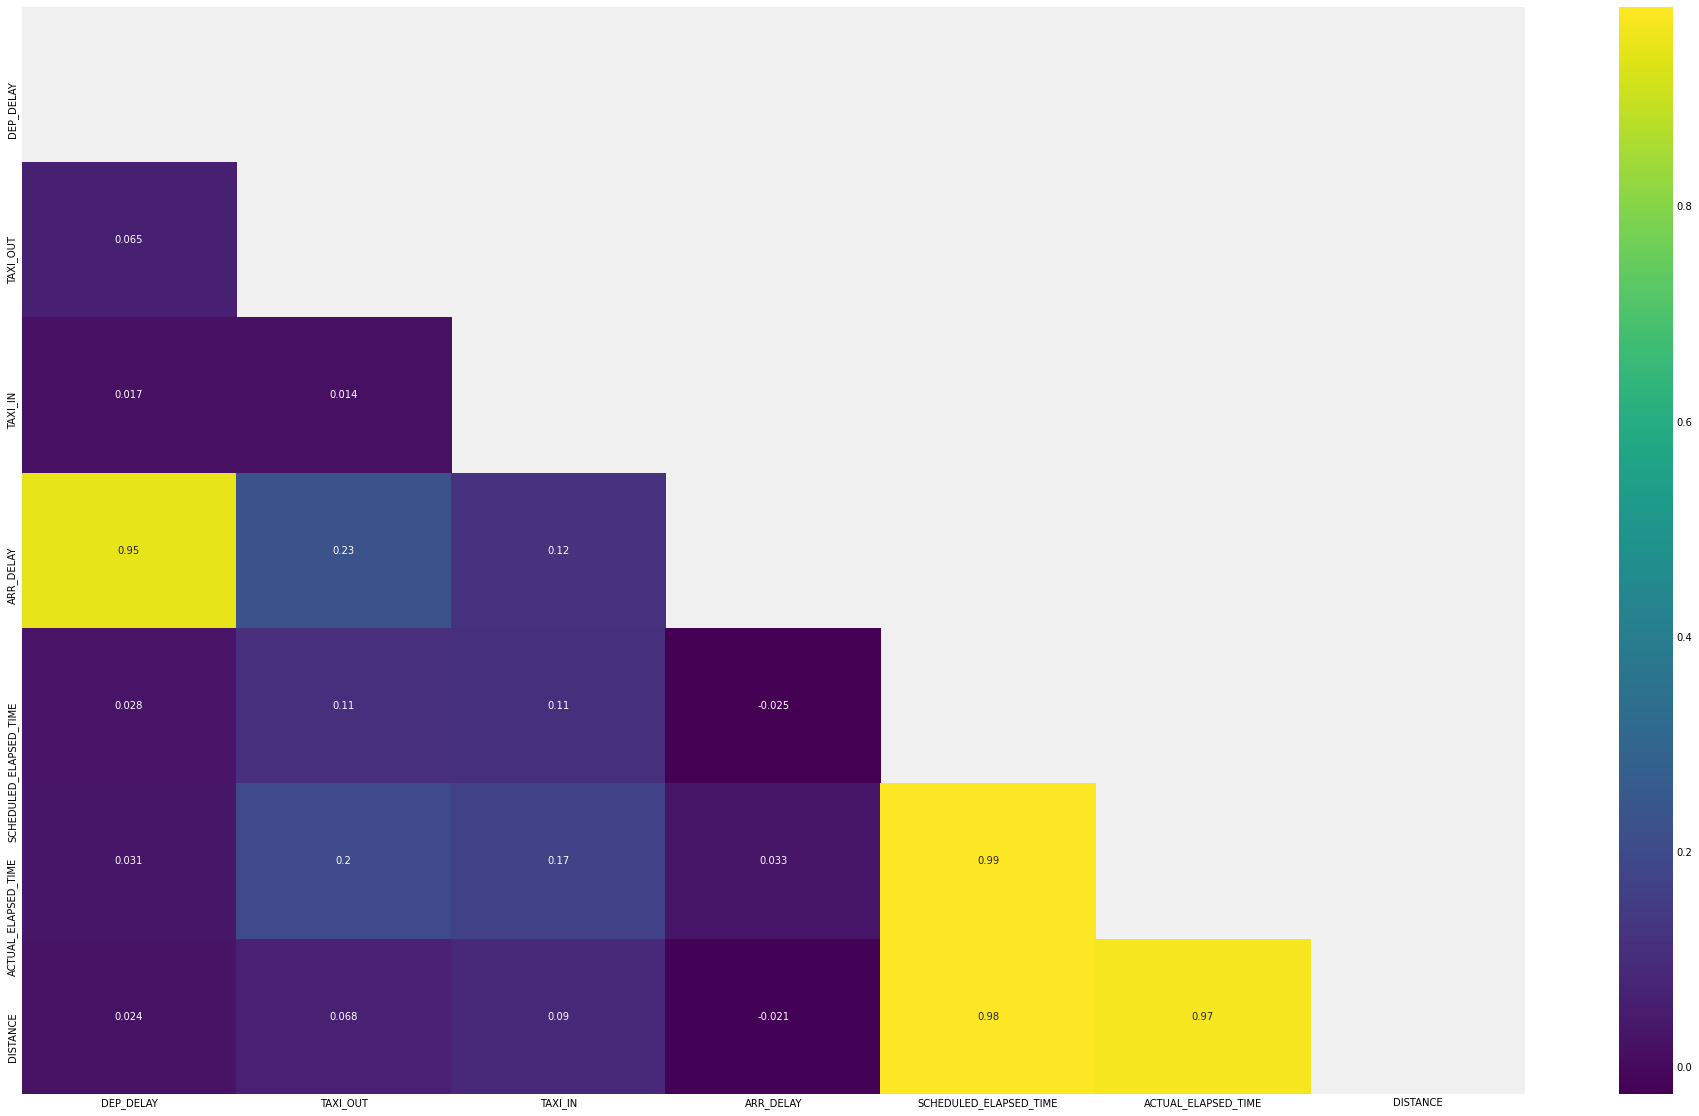

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(30,20))
sns.heatmap(newFlights.corr(),cmap="viridis",annot=True, fmt='.2g', mask=np.triu(newFlights.corr()))

FUNCTION TO MAKE CONFUSION MATRIX Function Retrived From : https://www.kaggle.com/agungor2/various-confusion-matrix-plots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
newFlights_Regg= newFlights.copy()#newFlights_Regg is the new dataset which will be used for logistic regression, SVN and Random Forest Classifier

In [ ]:
newFlights_Regg['DEP_DELAY'] = newFlights_Regg['DEP_DELAY'].apply(lambda x: 0 if x<=5 else 1)# changing all the values in DEP_DELAY if the delay is less than 5 minutes then it would be 0 if it is more than 5 minutes it would be 1

In [ ]:
newFlights_Regg['ARR_DELAY'] = newFlights_Regg['ARR_DELAY'].apply(lambda x: 0 if x<=5 else 1)# changing all the values in ARR_DELAY if the delay is less than 5 minutes then it would be 0 if it is more than 5 minutes it would be 1

In [ ]:
newFlights_Regg.head()

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,0,15.0,7.0,0,63.0,62.0,177.0
1,1,20.0,9.0,0,194.0,179.0,1076.0
2,1,19.0,10.0,1,57.0,61.0,177.0
3,1,8.0,4.0,0,196.0,176.0,1222.0
4,0,15.0,10.0,0,152.0,140.0,925.0


In [ ]:
#Add cleaned new data to BiggerAirline.csv to be used for further exploration
newFlights_Regg.to_csv('/content/drive/My Drive/BigDataProject_Group_1/BiggerAirline.csv')